In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12, 8)
plt.rcParams["font.size"] = 22

# The 2nd order Runge-Kutta method (RK2)

As a starting point, here's the Euler intergration code I wrote previously again. First, the general implementation of the Euler method:

In [2]:
g = 9.8 # m/s^2
L = 5 # m
om0 = (g/L) ** .5
phi0 = 0.5 # initial angle

In [3]:
def euler(y0, f, dt, t_final):
    """
    Given the rhs function f(t, y) and initial condition y, uses the 
    Euler method to numerically integrate the ODE dy/dt = f(t, y) from
    0 to t_final using a timestep of dt
    """
    t = np.arange(0, t_final, dt)
    y = np.empty((len(y0), t.shape[0]))
    y[:,0] = y0
    for n in range(len(t)-1):
        rhs = np.asarray(f(t[n], y[:,n]))
        y[:,n+1] = y[:,n] + dt * rhs
    return t, y

Here, we specifically define our system of ODEs for the skateboard problem.

In [4]:
# solution vector y = (omega, phi)
# rhs of the ODE we're solving
def f_skateboard(t, y):
    omega, phi = y
    return [-om0**2 * phi, omega]

# initial condition
y0 = [0, phi0]

Now, use the Euler method to solve our ODE using a timestep $\Delta t = 0.1$.

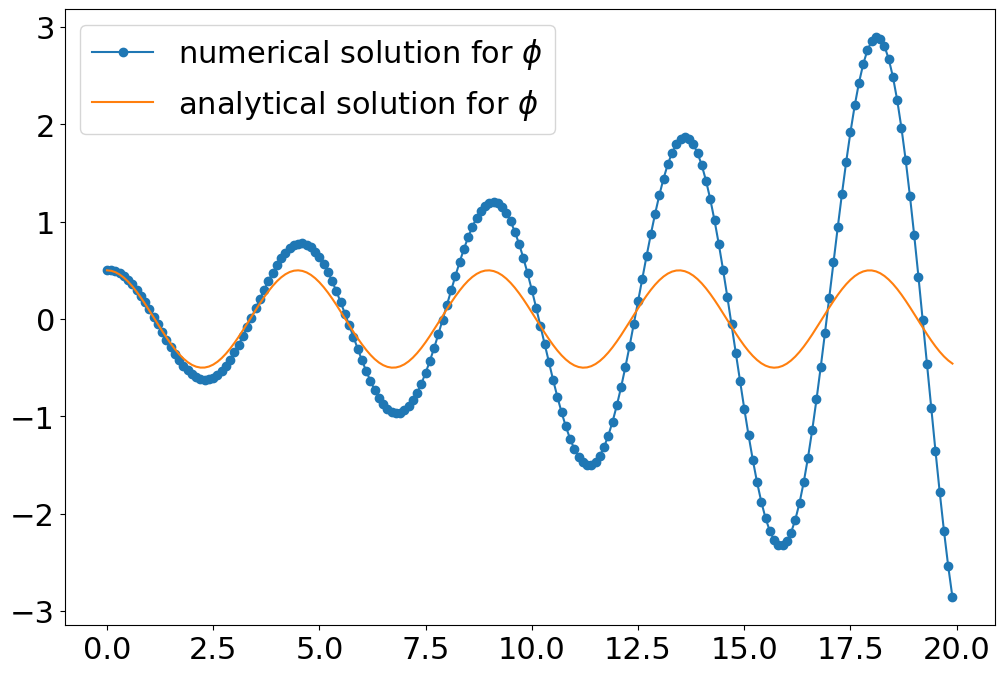

In [5]:
def integrate_and_plot(dt, t_final):
    t, y = euler(y0, f_skateboard, dt, t_final)
    plt.plot(t, y[1,:], '-o', label='numerical solution for $\phi$');
    plt.plot(t, phi0 * np.cos(om0 * t), label='analytical solution for $\phi$')
    plt.legend()
    
integrate_and_plot(dt=.1, t_final=20)

So this really doesn't look that great.

Let's first take a step back and go back to solving the single 1st order ODE given in the RK2 tutorial,

$$\dot y = -2y$$

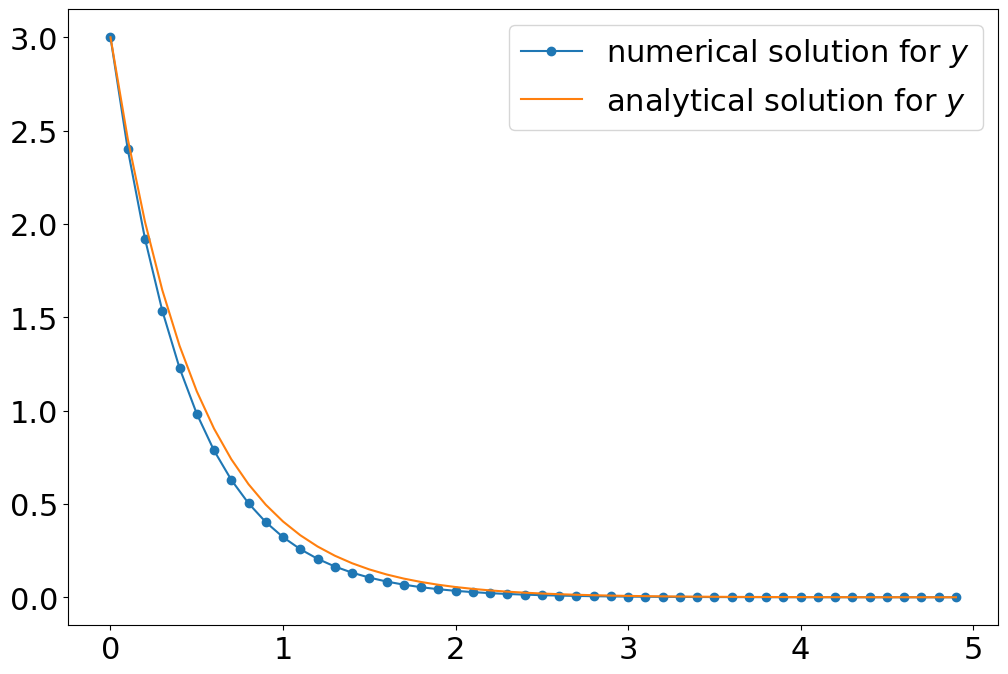

In [6]:
# solution vector y
# rhs of the ODE we're solving
def f_simple(t, y):
    return [-2*y]

# initial condition
y0 = [3]

def integrate_and_plot_simple(dt, t_final):
    t, y = euler(y0, f_simple, dt, t_final)
    plt.plot(t, y[0,:], '-o', label='numerical solution for $y$');
    plt.plot(t, 3*np.exp(-2 * t), label='analytical solution for $y$')
    plt.legend()
    
integrate_and_plot_simple(dt=.1, t_final=5)

So yeah, it's working, but not great.

Let's implement a 2nd order method, RK2 a.k.a. midpoint method. This follow what the tutorial does, ie., save the first rhs in $k_1$, use that to advance y half a timestep to an intermediate solution $y_*$, and then calculate the rhs there as $k_2$, and use that better approximation to advance $y$ one timestep.

In [7]:
def rk2(y0, f, dt, t_final):
    """
    Given the rhs function f(t, y) and initial condition y, uses the 
    RK2 method to numerically integrate the ODE dy/dt = f(t, y) from
    0 to t_final using a timestep of dt
    """
    t = np.arange(0, t_final, dt)
    y = np.empty((len(y0), t.shape[0]))
    y[:,0] = y0
    for n in range(len(t)-1):
        k1 = np.asarray(f(t[n], y[:,n]))
        ystar = y[:,n] + .5 * dt * k1
        k2 = np.asarray(f(t[n]+.5*dt, ystar))
        y[:,n+1] = y[:,n] + dt * k2
    return t, y

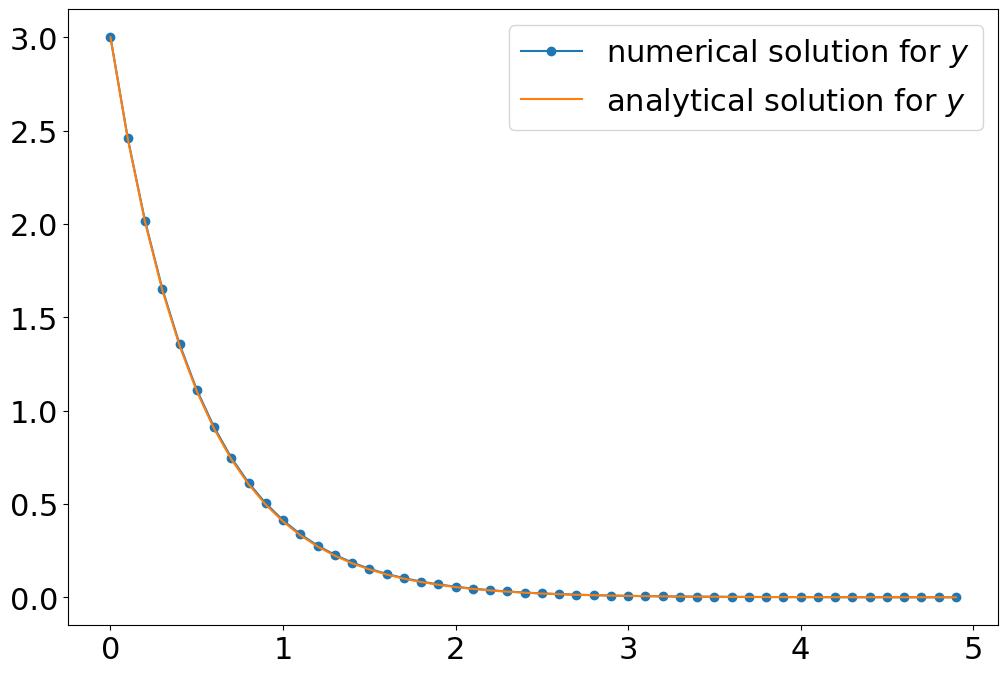

In [8]:
def integrate_and_plot_simple_rk2(dt, t_final):
    t, y = rk2(y0, f_simple, dt, t_final)
    plt.plot(t, y[0,:], '-o', label='numerical solution for $y$');
    plt.plot(t, 3*np.exp(-2 * t), label='analytical solution for $y$')
    plt.legend()
    
integrate_and_plot_simple_rk2(dt=.1, t_final=5)

So yeah, this looks much better, ie., we can't really tell a difference from the analytical solution even given the pretty large timestep $\Delta t = 0.1$.
Fortunately, my euler / rk2 integrators are written in a way that I can just reuse them for the skateboard problem:

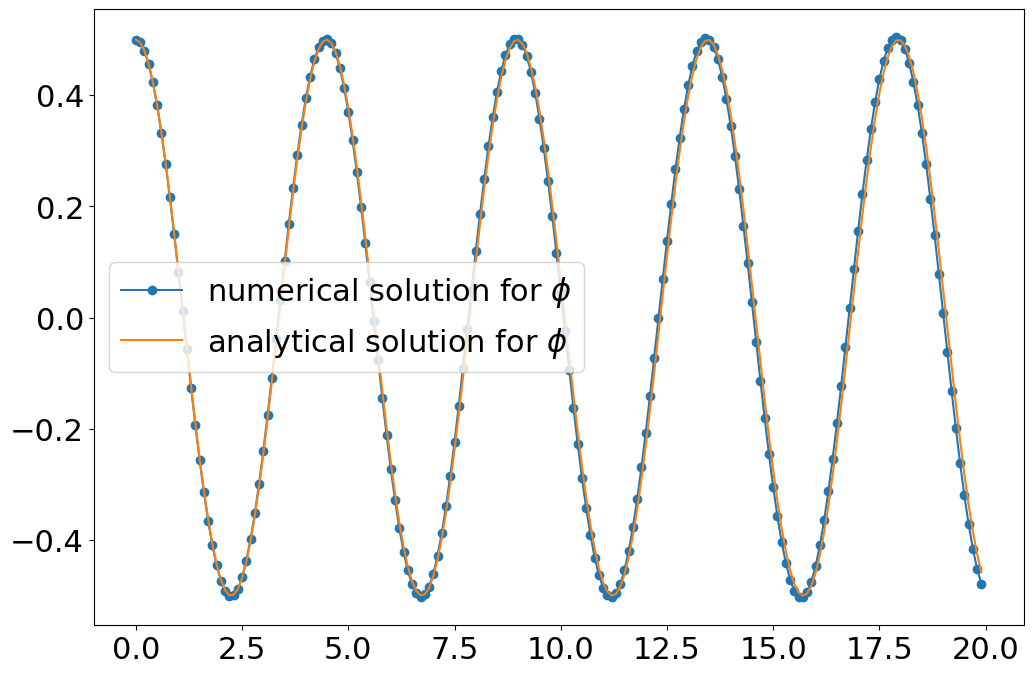

In [9]:
y0 = [0, phi0]

def integrate_and_plot_rk2(dt, t_final):
    t, y = rk2(y0, f_skateboard, dt, t_final)
    plt.plot(t, y[1,:], '-o', label='numerical solution for $\phi$');
    plt.plot(t, phi0 * np.cos(om0 * t), label='analytical solution for $\phi$')
    plt.legend()
    
integrate_and_plot_rk2(dt=.1, t_final=20)

This does look way better than the Euler method!

At late times, one can still see some deviations, which disappear at a smaller timestep, as shown below. (The solution is still only approximate, but I'd say definitely good enough at this point.)

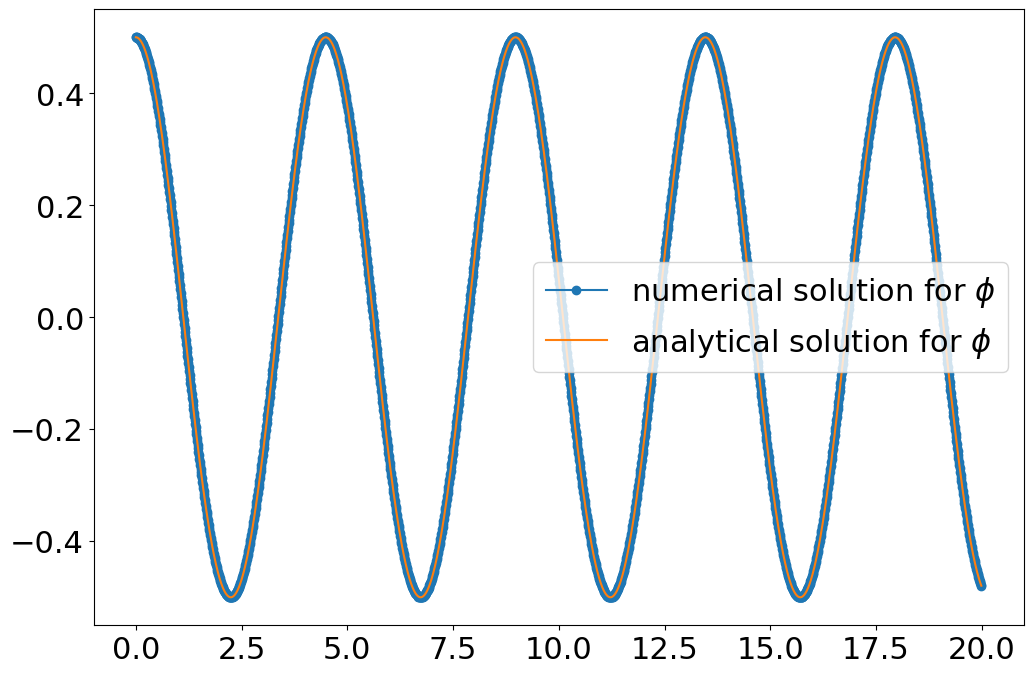

In [10]:
integrate_and_plot_rk2(dt=.01, t_final=20)